In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", 200)
import warnings
warnings.filterwarnings('ignore')

## Read datasets from CSV

In [2]:
df = pd.read_csv("../1_Attack dataset/Internet/attack_dataset.csv") # attack dataset
bonafide = pd.read_csv('../2_Bonafide dataset/data/bonafide_dataset_20191121.csv.gz') # bonafide traffic from mawilab
bonafide = pd.concat([bonafide, pd.read_csv('../2_Bonafide dataset/data/bonafide_dataset_20201110.csv.gz')])
bonafide = pd.concat([bonafide, pd.read_csv('../2_Bonafide dataset/data/bonafide_dataset_20201129.csv.gz')])
print(df.shape, bonafide.shape)

(455503, 42) (380438, 41)


In [3]:
bonafide['label'] = "normal" # label column in the bonafide dataset

## Comparison of datasets
> Check if both datasets have the same columns and calculate the % of attacks vs. normal traffic

In [4]:
if (df.columns == bonafide.columns).all():
    examples_malicious = df.shape[0]
    examples_legitim = bonafide.shape[0]
    total = examples_malicious+examples_legitim
    print('Total examples of {0} with {1:0.2f} of attack and {2:0.2f} bonafide packets'.format(total, examples_malicious/total, examples_legitim/total))

Total examples of 835941 with 0.54 of attack and 0.46 bonafide packets


In [5]:
df.head()

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Sep 2, 2020 21:04:37.063530000 -03",1.599091e+09,1,74,74,0x00000800,4,20,NaN,0x00001b58,0x00000000,0,0,0,0,35,6,0x00003e78,179.241.213.24,172.26.8.200,60,0x00000000,1697,5802,0,0,0,40,0x00000002,0,1,0,0,0,0,0,64240,0x0000c9e9,0,1410.0,nmap_null
1,1,"Sep 2, 2020 21:04:39.363792000 -03",1.599091e+09,2,74,74,0x00000800,4,20,NaN,0x000098f1,0x00000000,0,0,0,0,33,6,0x0000c2de,179.241.213.24,172.26.8.200,60,0x00000000,1722,5060,0,0,0,40,0x00000002,0,1,0,0,0,0,0,64240,0x000090cb,0,1410.0,nmap_null
2,1,"Nov 16, 2020 18:15:14.851050000 -03",1.605561e+09,1,54,54,0x00000800,4,20,NaN,0x00007d48,0x00000000,0,0,0,0,37,6,0x0000ff86,34.227.65.60,172.26.8.200,40,0x00000000,44952,443,1,1,0,20,0x00000010,0,0,0,0,1,0,0,1024,0x00005bc3,0,NaN,nmap_window
3,1,"Nov 16, 2020 18:15:14.851566000 -03",1.605561e+09,2,54,54,0x00000800,4,20,NaN,0x000072bd,0x00000000,0,0,0,0,28,6,0x00001312,34.227.65.60,172.26.8.200,40,0x00000000,44952,1025,1,1,0,20,0x00000010,0,0,0,0,1,0,0,1024,0x0000597d,0,NaN,nmap_window
4,1,"Nov 16, 2020 18:15:14.851753000 -03",1.605561e+09,3,54,54,0x00000800,4,20,NaN,0x0000b39a,0x00000000,0,0,0,0,31,6,0x0000cf34,34.227.65.60,172.26.8.200,40,0x00000000,44952,111,1,1,0,20,0x00000010,0,0,0,0,1,0,0,1024,0x00005d0f,0,NaN,nmap_window


In [6]:
df.label.value_counts()

label
zmap             74613
nmap_connect     45882
hping_syn        43750
unicorn_syn      43039
nmap_syn         40642
unicorn_conn     39170
masscan          21138
nmap_ack         20497
nmap_window      18851
nmap_null        12511
nmap_xmas        12505
nmap_fin         12504
hping_ack        11344
nmap_maimon      10493
unicorn_ack       8494
hping_fin         7344
hping_null        7344
hping_xmas        7344
unicorn_null      4690
unicorn_xmas      4466
unicorn_fxmas     4444
unicorn_fin       4438
Name: count, dtype: int64

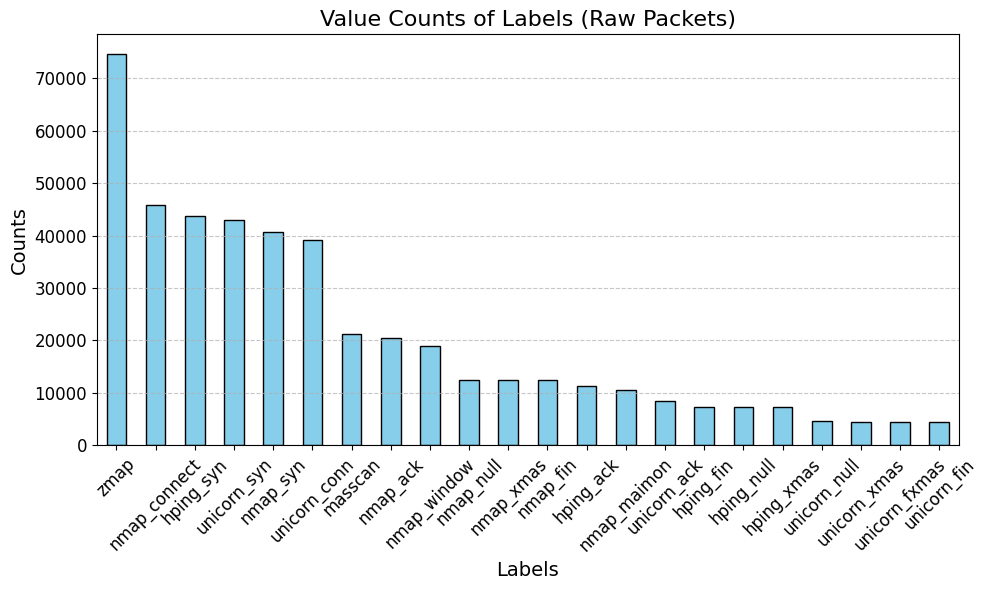

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # example of loading your DataFrame

# Calculate value counts
value_counts = df['label'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot for publication
plt.title('Value Counts of Labels (Raw Packets)', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure in a high-resolution format
plt.tight_layout()
plt.savefig('value_counts_bar_chart.png', dpi=300)
plt.show()


---
## Pre-processing
> It is required to convert features that are extracted from `pcap` as hexadecimal

> Replaced the fields with null values (NaN) by zero

In [8]:
fields = ['eth.type', 'ip.id', 'ip.flags', 'ip.checksum', 'ip.dsfield', 'tcp.flags', 'tcp.checksum']

for field in fields:
    df[field] = df[field].apply(lambda x: int(str(x), 16))
    

In [9]:
bonafide = bonafide.fillna(0)
for field in fields:
    bonafide[field] = bonafide[field].apply(lambda x: int(str(x), 16))

### Create a dataset with all packets (bonafide and attack)

In [10]:
full_data = pd.concat([bonafide, df])

### Check if there are packets with protocol field different than TCP (value 6)

In [11]:
wrong_proto = full_data[full_data['ip.proto'] != 6]['label'].value_counts().values
full_data = full_data[full_data['ip.proto'] == 6]
print("Found and removed", wrong_proto,"packets from the original dataset.")

Found and removed [52177] packets from the original dataset.


In [12]:
full_data.label.value_counts()

label
normal           328261
zmap              74613
nmap_connect      45882
hping_syn         43750
unicorn_syn       43039
nmap_syn          40642
unicorn_conn      39170
masscan           21138
nmap_ack          20497
nmap_window       18851
nmap_null         12511
nmap_xmas         12505
nmap_fin          12504
hping_ack         11344
nmap_maimon       10493
unicorn_ack        8494
hping_fin          7344
hping_null         7344
hping_xmas         7344
unicorn_null       4690
unicorn_xmas       4466
unicorn_fxmas      4444
unicorn_fin        4438
Name: count, dtype: int64

### Features not applicable to this work

> Remove features from layer 2 (link):
> - frame_info.time
> - frame_info.encap_type
> - frame_info.time_epoch
> - frame_info.number
> - frame_info.len
> - frame_info.cap_len
> - eth.type

> Remove redundant features or non-variant (constant)
> - ip.version - we are considering only IPv4
> - ip.proto - we are considering only TCP
> - ip.src
> - ip.dst
> - ip.flags
> - tcp.flags

In [13]:
full_data.drop(columns=[ 'frame_info.encap_type', 'frame_info.time_epoch', 'frame_info.number', #'frame_info.time',
                        'frame_info.len', 'frame_info.cap_len', 'eth.type', 'ip.flags', #'ip.src', 'ip.dst', 'ip.proto',
                        'ip.version', 'tcp.flags'], axis=1, inplace=True)

In [14]:
full_data.drop(columns=['ip.hdr_len', 'ip.tos', 'ip.flags.rb', 
                        'ip.flags.mf', 'ip.frag_offset'], axis=1, inplace=True)

In [15]:
full_data['label'].value_counts()

label
normal           328261
zmap              74613
nmap_connect      45882
hping_syn         43750
unicorn_syn       43039
nmap_syn          40642
unicorn_conn      39170
masscan           21138
nmap_ack          20497
nmap_window       18851
nmap_null         12511
nmap_xmas         12505
nmap_fin          12504
hping_ack         11344
nmap_maimon       10493
unicorn_ack        8494
hping_fin          7344
hping_null         7344
hping_xmas         7344
unicorn_null       4690
unicorn_xmas       4466
unicorn_fxmas      4444
unicorn_fin        4438
Name: count, dtype: int64

In [16]:
full_data.label[full_data.label == "normal"] = 0 # replace "normal" labels to 0
full_data.label[full_data.label != 0] = 1 # replace all scan labels to 1
full_data['label'].value_counts()

label
1    455503
0    328261
Name: count, dtype: int64

In [17]:
full_data.shape

(783764, 28)

### Remove more columns
>
> - checksum and acknowlegde are random
> - tcp.dstport will tend to learn the testbed (some tools were targeted to specific services)

In [18]:
full_data.drop(columns=["ip.checksum", "tcp.checksum"], axis=1, inplace=True)
#  "tcp.options.mss_val" , "tcp.seq", "tcp.srcport",

In [19]:
full_data

,frame_info.time,ip.id,ip.flags.df,ip.ttl,ip.proto,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.urgent_pointer,tcp.options.mss_val,label
1,"Nov 21, 2019 02:00:00.313671000 -03",46834,0.0,247.0,6.0,89.8.230.210,163.221.247.4,40.0,0,53026.0,57963.0,0.0,0.0,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,0.0,0
3,"Nov 21, 2019 02:00:00.316152000 -03",3793,1.0,56.0,6.0,104.121.123.76,163.221.115.219,537.0,8,443.0,34530.0,1.0,1.0,485.0,32.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,252.0,0.0,0.0,0
4,"Nov 21, 2019 02:00:00.316227000 -03",0,1.0,59.0,6.0,202.11.241.113,111.114.228.0,80.0,0,59206.0,80.0,1.0,1.0,0.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4677.0,0.0,0.0,0
5,"Nov 21, 2019 02:00:00.316868000 -03",8559,1.0,55.0,6.0,165.228.92.6,133.24.158.80,54.0,0,52239.0,23.0,1.0,1.0,2.0,32.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,115.0,0.0,0.0,0
6,"Nov 21, 2019 02:00:00.316944000 -03",54321,0.0,244.0,6.0,107.65.48.36,133.139.52.83,40.0,8,44034.0,23.0,0.0,0.0,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65535.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455498,"Aug 29, 2020 14:58:37.972195000 -03",26910,1.0,28.0,6.0,187.121.40.97,172.26.11.54,60.0,0,35408.0,1718.0,0.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64240.0,0.0,1440.0,1
455499,"Aug 29, 2020 14:58:37.973992000 -03",45092,1.0,32.0,6.0,187.121.40.97,172.26.11.54,60.0,0,44454.0,65531.0,0.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64240.0,0.0,1440.0,1
455500,"Aug 29, 2020 14:58:37.974923000 -03",4058,1.0,28.0,6.0,187.121.40.97,172.26.11.54,60.0,0,58236.0,1214.0,0.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64240.0,0.0,1440.0,1
455501,"Aug 29, 2020 14:58:37.978759000 -03",1422,1.0,32.0,6.0,187.121.40.97,172.26.11.54,60.0,0,59870.0,2989.0,0.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,64240.0,0.0,1440.0,1


---
# Drop duplicates

In [20]:
full_data.drop_duplicates(inplace=True, ignore_index=True)

In [21]:
full_data['label'].value_counts()

label
1    366602
0    328261
Name: count, dtype: int64

---

In [22]:
full_data.head()

,frame_info.time,ip.id,ip.flags.df,ip.ttl,ip.proto,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.urgent_pointer,tcp.options.mss_val,label
0,"Nov 21, 2019 02:00:00.313671000 -03",46834,0.0,247.0,6.0,89.8.230.210,163.221.247.4,40.0,0,53026.0,57963.0,0.0,0.0,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,0.0,0
1,"Nov 21, 2019 02:00:00.316152000 -03",3793,1.0,56.0,6.0,104.121.123.76,163.221.115.219,537.0,8,443.0,34530.0,1.0,1.0,485.0,32.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,252.0,0.0,0.0,0
2,"Nov 21, 2019 02:00:00.316227000 -03",0,1.0,59.0,6.0,202.11.241.113,111.114.228.0,80.0,0,59206.0,80.0,1.0,1.0,0.0,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4677.0,0.0,0.0,0
3,"Nov 21, 2019 02:00:00.316868000 -03",8559,1.0,55.0,6.0,165.228.92.6,133.24.158.80,54.0,0,52239.0,23.0,1.0,1.0,2.0,32.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,115.0,0.0,0.0,0
4,"Nov 21, 2019 02:00:00.316944000 -03",54321,0.0,244.0,6.0,107.65.48.36,133.139.52.83,40.0,8,44034.0,23.0,0.0,0.0,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65535.0,0.0,0.0,0


In [23]:
# needed for flow analysis: len, timestamp, flags: "FIN": "SYN":  "RST":  "PSH":  "ACK":  "URG"; pseudo_hash params

In [24]:
raw_data = full_data # drop?

In [25]:
# transfer full_data -> truncated packets

In [26]:
from utils.flow import *
from utils.flow_calculations import *
from utils.truncated_packet import *

In [27]:
full_data.columns

Index(['frame_info.time', 'ip.id', 'ip.flags.df', 'ip.ttl', 'ip.proto',
       'ip.src', 'ip.dst', 'ip.len', 'ip.dsfield', 'tcp.srcport',
       'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.len', 'tcp.hdr_len',
       'tcp.flags.fin', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push',
       'tcp.flags.ack', 'tcp.flags.urg', 'tcp.flags.cwr', 'tcp.window_size',
       'tcp.urgent_pointer', 'tcp.options.mss_val', 'label'],
      dtype='object')

In [69]:
# saving full data

full_data.columns

Index(['frame_info.time', 'ip.id', 'ip.flags.df', 'ip.ttl', 'ip.proto',
       'ip.src', 'ip.dst', 'ip.len', 'ip.dsfield', 'tcp.srcport',
       'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.len', 'tcp.hdr_len',
       'tcp.flags.fin', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.push',
       'tcp.flags.ack', 'tcp.flags.urg', 'tcp.flags.cwr', 'tcp.window_size',
       'tcp.urgent_pointer', 'tcp.options.mss_val', 'label'],
      dtype='object')

In [70]:
import pandas as pd

# Usuwane kolumny
columns_to_drop = ['frame_info.time', 'ip.id', 'ip.flags.df', 'ip.src', 'ip.dst', 'ip.dsfield', 'tcp.srcport', 'tcp.dstport']

# Usuwanie kolumn
modified_data = full_data.drop(columns=columns_to_drop)

# Zapisywanie zmodyfikowanego DataFrame do pliku CSV
modified_data.to_csv('original_packets.csv', index=False)

print("Modified DataFrame saved to 'original_packets.csv'")


Modified DataFrame saved to 'original_packets.csv'


In [28]:
data = full_data

In [29]:
# full_data --> truncated packets
# truncated_packets = assign_flow_ids_to_packets(truncated_packets)
# flow_ids = set(packet.flow_id for packet in truncated_packets)
# for fid in flow_ids
# sizing_stats = prepare_size_stats(modified_packets, self.flow_id)
# timing_stats = prepare_timing_stats(modified_packets, self.flow_id)
# merge sizing and timing with label

In [30]:
attack_df = data[data['label'] == 1]
normal_df = data[data['label'] == 0]

In [31]:
attack_df.shape

(366602, 26)

In [32]:
normal_df.shape

(328261, 26)

In [33]:
class TruncatedPacket:
    def __init__(
        self,
        packet_id,
        timestamp,
        size,
        pseudo_hash,
        flow_id,
        direction,
        src_ip,
        fragmented,   
        tcp,
        udp,
        fin,
        syn,
        rst,
        ack,
        psh,
        urg,
    ):
        self.packet_id = packet_id
        self.timestamp = timestamp
        self.size = size
        self.pseudo_hash = pseudo_hash
        self.flow_id = flow_id
        self.direction = direction
        self.src_ip = src_ip
        self.fragmented = fragmented
        self.tcp = tcp
        self.udp = udp
        self.fin = fin
        self.syn = syn
        self.rst = rst
        self.ack = ack
        self.psh = psh
        self.urg = urg

    def __repr__(self):
        return (
            f"TruncatedPacket(packet_id={self.packet_id}, timestamp={self.timestamp}, size={self.size}, "
            f"pseudo_hash='{self.pseudo_hash}', flow_id={self.flow_id}, direction='{self.direction}', src_ip={self.src_ip}, fragmented={self.fragmented}, "
            f"tcp={self.tcp}, udp={self.udp}, fin={self.fin}, syn={self.syn}, rst={self.rst}, ack={self.ack}, psh={self.psh}, urg={self.urg})"
        )

In [57]:
import pandas as pd
import hashlib
import numpy as np

def generate_pseudo_hash(row):
    elements = []
    if row['ip.proto'] == 6:  # TCP
        elements = [
            hash(row['ip.src']),
            hash(row['ip.dst']),
            #int(row['tcp.srcport']),
            #int(row['tcp.dstport']),
            int(row['ip.proto']),
        ]
    elif row['ip.proto'] == 17:  # UDP
        elements = [
            hash(row['ip.src']),
            hash(row['ip.dst']),
            #int(row['udp.srcport']),
            #int(row['udp.dstport']),
            int(row['ip.proto']),
        ]

    return int(sum(elements)) if elements else None

# Konwersja timestampów przed przetwarzaniem
normal_df['unix_timestamp'] = pd.to_datetime(normal_df['frame_info.time'], infer_datetime_format=True, utc=True).apply(lambda x: x.timestamp())
attack_df['unix_timestamp'] = pd.to_datetime(attack_df['frame_info.time'], infer_datetime_format=True, utc=True).apply(lambda x: x.timestamp())

def map_to_truncated_packet(row):
    return TruncatedPacket(
        packet_id=row['ip.id'],
        timestamp=row['unix_timestamp'],  # Użycie wcześniej przekonwertowanego timestampu
        size=row['ip.len'],
        pseudo_hash=generate_pseudo_hash(row),
        flow_id=None,
        direction=None,  # Dopasuj do swojego kontekstu
        src_ip=row['ip.src'],
        fragmented=False,
        tcp=row['ip.proto'] == 6,
        udp=row['ip.proto'] == 17,
        fin=row['tcp.flags.fin'] if row['ip.proto'] == 6 else 0,
        syn=row['tcp.flags.syn'] if row['ip.proto'] == 6 else 0,
        rst=row['tcp.flags.reset'] if row['ip.proto'] == 6 else 0,
        ack=row['tcp.flags.ack'] if row['ip.proto'] == 6 else 0,
        psh=row['tcp.flags.push'] if row['ip.proto'] == 6 else 0,
        urg=row['tcp.flags.urg'] if row['ip.proto'] == 6 else 0,
    )

# Tworzenie tablicy obiektów TruncatedPacket
truncated_packets_attack = attack_df.apply(map_to_truncated_packet, axis=1).tolist()
truncated_packets_normal = normal_df.apply(map_to_truncated_packet, axis=1).tolist()

# Wyświetl przykładowy obiekt
print(truncated_packets_attack[0])
print(truncated_packets_normal[0])

TruncatedPacket(packet_id=7000, timestamp=1599091477.06353, size=60.0, pseudo_hash='-7302956589648232939', flow_id=None, direction='None', src_ip=179.241.213.24, fragmented=False, tcp=True, udp=False, fin=0.0, syn=1.0, rst=0.0, ack=0.0, psh=0.0, urg=0.0)
TruncatedPacket(packet_id=46834, timestamp=1574312400.313671, size=40.0, pseudo_hash='1109508240214983162', flow_id=None, direction='None', src_ip=89.8.230.210, fragmented=False, tcp=True, udp=False, fin=0.0, syn=1.0, rst=0.0, ack=0.0, psh=0.0, urg=0.0)


In [58]:
truncated_packets_attack = assign_flow_ids_to_packets(truncated_packets_attack)
truncated_packets_normal = assign_flow_ids_to_packets(truncated_packets_normal)
print(truncated_packets_attack[0])
print(truncated_packets_normal[0])

hash groups: 23
hash groups: 173980
TruncatedPacket(packet_id=7000, timestamp=1599091477.06353, size=60.0, pseudo_hash='-7302956589648232939', flow_id=3, direction='1', src_ip=179.241.213.24, fragmented=False, tcp=True, udp=False, fin=0.0, syn=1.0, rst=0.0, ack=0.0, psh=0.0, urg=0.0)
TruncatedPacket(packet_id=46834, timestamp=1574312400.313671, size=40.0, pseudo_hash='1109508240214983162', flow_id=1, direction='1', src_ip=89.8.230.210, fragmented=False, tcp=True, udp=False, fin=0.0, syn=1.0, rst=0.0, ack=0.0, psh=0.0, urg=0.0)


In [59]:
flow_ids_attack = set(packet.flow_id for packet in truncated_packets_attack)
print(len(flow_ids_attack))

10458


In [60]:
flow_ids_normal = set(packet.flow_id for packet in truncated_packets_normal)
print(len(flow_ids_normal))

175336


In [61]:
# for fid in flow_ids
#     sizing_stats = prepare_size_stats(modified_packets, fid)
#     timing_stats = prepare_timing_stats(modified_packets, fid)
#     merge sizing stats and timing stats (dicts) as a single row, with additional given label

In [62]:
def count_packets(packets, flow_id):
    return sum(1 for p in packets if p.flow_id == flow_id)

def calculate_flag_statistics(flow_id, packets):
    flags = {'fin': 0, 'syn': 0, 'rst': 0, 'ack': 0, 'psh': 0, 'urg': 0}
    for p in packets:
        if p.flow_id == flow_id:
            flags['fin'] += p.fin
            flags['syn'] += p.syn
            flags['rst'] += p.rst
            flags['ack'] += p.ack
            flags['psh'] += p.psh
            flags['urg'] += p.urg
    return flags

def process_flows(flow_ids, packets, label):
    rows = []
    for fid in flow_ids:
        size_stats = calculate_size_statistics(fid, packets)
        timing_stats = calculate_delta_time_statistics(fid, packets)
        packet_count = count_packets(packets, fid)
        flag_stats = calculate_flag_statistics(fid, packets)
        combined_stats = {**size_stats, **timing_stats, **flag_stats, 'packet_count': packet_count, 'label': label}
        rows.append(combined_stats)
    return pd.DataFrame(rows)


In [63]:
# Example usage:

df_attack = process_flows(flow_ids_attack, truncated_packets_attack, 1)
df_attack1 = df_attack[df_attack['packet_count'] > 1]

df_attack1.head(10)

,sizing_mean,sizing_min,sizing_max,sizing_std,deltas_mean,deltas_min,deltas_max,deltas_std,fin,syn,rst,ack,psh,urg,packet_count,label
2,60.0,60.0,60.0,0.000000,2.300262,2.300262,2.300262,0.000000,0.0,2.0,0.0,0.0,0.0,0.0,2,1
2099,40.0,40.0,40.0,0.000000,0.165682,0.000003,162.258294,3.266761,0.0,0.0,0.0,2485.0,0.0,0.0,2485,1
2102,54.4,40.0,60.0,7.838367,0.992598,0.000010,3.759592,1.201244,1.0,6.0,2.0,2.0,0.0,0.0,10,1
2103,60.0,60.0,60.0,0.000000,25.808161,1.662461,49.953861,24.145700,0.0,3.0,0.0,0.0,0.0,0.0,3,1


In [64]:
# Example usage:

df_normal = process_flows(flow_ids_normal, truncated_packets_normal, 0)
df_normal1 = df_normal[df_normal['packet_count'] > 1]

df_normal1.head(10)

,sizing_mean,sizing_min,sizing_max,sizing_std,deltas_mean,deltas_min,deltas_max,deltas_std,fin,syn,rst,ack,psh,urg,packet_count,label
1,212.333333,40.0,537.0,229.719152,1.166768,0.788666,1.544871,0.378102,0.0,1.0,1.0,1.0,1.0,0.0,3,0
5,59.625000,40.0,80.0,11.847336,0.066180,0.000006,0.821089,0.152468,0.0,0.0,0.0,32.0,0.0,0.0,32,0
9,1426.000000,1426.0,1426.0,0.000000,0.006420,0.000006,0.088050,0.009264,0.0,0.0,0.0,404.0,7.0,0.0,404,0
10,1426.000000,1426.0,1426.0,0.000000,0.025249,0.000006,0.368618,0.057850,0.0,0.0,0.0,95.0,3.0,0.0,95,0
12,1523.533333,1500.0,1853.0,88.053671,0.003400,0.000048,0.011473,0.003817,0.0,0.0,0.0,15.0,0.0,0.0,15,0
13,1680.220126,1500.0,3313.0,454.689384,0.011041,0.000004,0.121451,0.033358,0.0,0.0,0.0,159.0,0.0,0.0,159,0
14,1255.000000,638.0,1671.0,445.026591,0.642129,0.362002,0.922257,0.280128,0.0,0.0,0.0,3.0,1.0,0.0,3,0
17,52.000000,52.0,52.0,0.000000,1.348453,1.348453,1.348453,0.000000,0.0,0.0,0.0,2.0,0.0,0.0,2,0
18,77.500000,52.0,103.0,25.500000,0.197852,0.197852,0.197852,0.000000,1.0,0.0,0.0,2.0,1.0,0.0,2,0
22,1231.564516,52.0,1500.0,562.519795,0.010372,0.000010,0.074845,0.012161,0.0,0.0,0.0,248.0,0.0,0.0,248,0


In [65]:
df_attack1.describe()

,sizing_mean,sizing_min,sizing_max,sizing_std,deltas_mean,deltas_min,deltas_max,deltas_std,fin,syn,rst,ack,psh,urg,packet_count,label
count,4.000000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.00,4.0,4.000000,4.0,4.0,4.000000,4.0
mean,53.600000,50.000000,55.0,1.959592,7.316676,0.990684,54.568002,7.153426,0.25,2.75,0.5,621.750000,0.0,0.0,625.000000,1.0
std,9.443163,11.547005,10.0,3.919184,12.358939,1.173195,75.126339,11.408235,0.50,2.50,1.0,1242.167024,0.0,0.0,1240.005108,0.0
min,40.000000,40.000000,40.0,0.000000,0.165682,0.000003,2.300262,0.000000,0.00,0.00,0.0,0.000000,0.0,0.0,2.000000,1.0
25%,50.800000,40.000000,55.0,0.000000,0.785869,0.000008,3.394760,0.900933,0.00,1.50,0.0,0.000000,0.0,0.0,2.750000,1.0
50%,57.200000,50.000000,60.0,0.000000,1.646430,0.831236,26.856727,2.234003,0.00,2.50,0.0,1.000000,0.0,0.0,6.500000,1.0
75%,60.000000,60.000000,60.0,1.959592,8.177237,1.821911,78.029969,8.486496,0.25,3.75,0.5,622.750000,0.0,0.0,628.750000,1.0
max,60.000000,60.000000,60.0,7.838367,25.808161,2.300262,162.258294,24.145700,1.00,6.00,2.0,2485.000000,0.0,0.0,2485.000000,1.0


In [66]:
# Combine the two DataFrames
df_combined = pd.concat([df_attack1, df_normal1])

# Save the combined DataFrame to a CSV file
df_combined.to_csv('flows_non_rygoristic_sample.csv', index=False)

print("Combined DataFrame saved to 'flows_non_rygoristic_sample.csv'")

Combined DataFrame saved to 'flows_non_rygoristic_sample.csv'


In [67]:
df_combined.describe()

,sizing_mean,sizing_min,sizing_max,sizing_std,deltas_mean,deltas_min,deltas_max,deltas_std,fin,syn,rst,ack,psh,urg,packet_count,label
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0,118.000000,118.000000
mean,458.392499,262.796610,678.796610,180.120186,0.539276,0.258455,2.239863,0.310756,0.118644,0.254237,0.101695,32.779661,0.788136,0.0,33.059322,0.033898
std,540.959261,476.545987,809.637869,298.804531,2.383578,0.433765,15.550079,2.238784,0.373697,0.764450,0.441246,232.354729,1.028248,0.0,232.319456,0.181739
min,40.000000,40.000000,40.000000,0.000000,0.000009,0.000003,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000
25%,55.750000,40.000000,60.000000,0.000000,0.030938,0.001981,0.072681,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,2.000000,0.000000
50%,121.125000,52.000000,189.500000,25.750000,0.166052,0.066535,0.268180,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.0,2.000000,0.000000
75%,774.500000,86.750000,1426.000000,238.929788,0.452824,0.294781,0.725195,0.104606,0.000000,0.000000,0.000000,4.000000,1.000000,0.0,4.000000,0.000000
max,1768.000000,1500.000000,4360.000000,1679.314146,25.808161,2.300262,162.258294,24.145700,2.000000,6.000000,3.000000,2485.000000,7.000000,0.0,2485.000000,1.000000


In [44]:
# save csv  files for both cases

In [ ]:
import pandas as pd
import hashlib
import numpy as np

def generate_pseudo_hash(row):
    elements = []
    if row['ip.proto'] == 6:  # TCP
        elements = [
            hash(row['ip.src']),
            hash(row['ip.dst']),
            int(row['tcp.srcport']),
            int(row['tcp.dstport']),
            int(row['ip.proto']),
        ]
    elif row['ip.proto'] == 17:  # UDP
        elements = [
            hash(row['ip.src']),
            hash(row['ip.dst']),
            int(row['udp.srcport']),
            int(row['udp.dstport']),
            int(row['ip.proto']),
        ]

    return int(sum(elements)) if elements else None

# Konwersja timestampów przed przetwarzaniem
normal_df['unix_timestamp'] = pd.to_datetime(normal_df['frame_info.time'], infer_datetime_format=True, utc=True).apply(lambda x: x.timestamp())
attack_df['unix_timestamp'] = pd.to_datetime(attack_df['frame_info.time'], infer_datetime_format=True, utc=True).apply(lambda x: x.timestamp())

def map_to_truncated_packet(row):
    return TruncatedPacket(
        packet_id=row['ip.id'],
        timestamp=row['unix_timestamp'],  # Użycie wcześniej przekonwertowanego timestampu
        size=row['ip.len'],
        pseudo_hash=generate_pseudo_hash(row),
        flow_id=None,
        direction=None,  # Dopasuj do swojego kontekstu
        src_ip=row['ip.src'],
        fragmented=False,
        tcp=row['ip.proto'] == 6,
        udp=row['ip.proto'] == 17,
        fin=row['tcp.flags.fin'] if row['ip.proto'] == 6 else 0,
        syn=row['tcp.flags.syn'] if row['ip.proto'] == 6 else 0,
        rst=row['tcp.flags.reset'] if row['ip.proto'] == 6 else 0,
        ack=row['tcp.flags.ack'] if row['ip.proto'] == 6 else 0,
        psh=row['tcp.flags.push'] if row['ip.proto'] == 6 else 0,
        urg=row['tcp.flags.urg'] if row['ip.proto'] == 6 else 0,
    )

# Tworzenie tablicy obiektów TruncatedPacket
truncated_packets_attack = attack_df.apply(map_to_truncated_packet, axis=1).tolist()
truncated_packets_normal = normal_df.apply(map_to_truncated_packet, axis=1).tolist()

# Wyświetl przykładowy obiekt
print(truncated_packets_attack[0])
print(truncated_packets_normal[0])

In [ ]:
truncated_packets_attack = assign_flow_ids_to_packets(truncated_packets_attack)
truncated_packets_normal = assign_flow_ids_to_packets(truncated_packets_normal)
print(truncated_packets_attack[0])
print(truncated_packets_normal[0])

In [ ]:
flow_ids_attack = set(packet.flow_id for packet in truncated_packets_attack)
print(len(flow_ids_attack))

In [ ]:
flow_ids_normal = set(packet.flow_id for packet in truncated_packets_normal)
print(len(flow_ids_normal))

In [ ]:
def count_packets(packets, flow_id):
    return sum(1 for p in packets if p.flow_id == flow_id)

def calculate_flag_statistics(flow_id, packets):
    flags = {'fin': 0, 'syn': 0, 'rst': 0, 'ack': 0, 'psh': 0, 'urg': 0}
    for p in packets:
        if p.flow_id == flow_id:
            flags['fin'] += p.fin
            flags['syn'] += p.syn
            flags['rst'] += p.rst
            flags['ack'] += p.ack
            flags['psh'] += p.psh
            flags['urg'] += p.urg
    return flags

def process_flows(flow_ids, packets, label):
    rows = []
    for fid in flow_ids:
        size_stats = calculate_size_statistics(fid, packets)
        timing_stats = calculate_delta_time_statistics(fid, packets)
        packet_count = count_packets(packets, fid)
        flag_stats = calculate_flag_statistics(fid, packets)
        combined_stats = {**size_stats, **timing_stats, **flag_stats, 'packet_count': packet_count, 'label': label}
        rows.append(combined_stats)
    return pd.DataFrame(rows)


In [ ]:
# Example usage:

df_attack = process_flows(flow_ids_attack, truncated_packets_attack, 1)
df_attack1 = df_attack[df_attack['packet_count'] > 1]

df_attack1.head(10)

In [ ]:
# Example usage:

df_normal = process_flows(flow_ids_normal, truncated_packets_normal, 0)
df_normal1 = df_normal[df_normal['packet_count'] > 1]

df_normal1.head(10)

In [ ]:
# Combine the two DataFrames
df_combined = pd.concat([df_attack1, df_normal1])

# Save the combined DataFrame to a CSV file
df_combined.to_csv('flows_rygoristic.csv', index=False)

print("Combined DataFrame saved to 'flows_non_rygoristic_sample.csv'")